In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data1 = loadmat("project9data2.mat")

In [3]:
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [4]:
print(data1["X"].shape)

(1000, 11)


In [5]:
X = data1["X"]

X_val = data1["Xval"]

y_val = data1["yval"]

m = X.shape[0]

In [6]:
X.shape

(1000, 11)

In [7]:
X

array([[  6.65311366,  13.68970163,  17.55284534, ...,  -4.88402408,
          5.34933534,  17.35137235],
       [ -5.63054206, -18.93766731,  18.64462416, ...,  -2.87717344,
         -6.00942041,  19.21063612],
       [  9.72152507,  -9.98248898,  15.57143412, ...,   0.7275748 ,
         10.392975  ,   7.0859949 ],
       ...,
       [  5.42020917,  -5.10984522,  12.19219937, ..., -13.89942441,
          9.41801605,   1.84138358],
       [ 11.60473151,  -9.13417459,  19.58251695, ...,   1.01426524,
         -0.7840654 ,   6.2179038 ],
       [  9.49130218, -12.82373283,  -0.51710828, ...,  -9.044737  ,
          7.70413334,   3.74875986]])

In [8]:
X_val

array([[ 18.27128267, -12.35926827,   5.00096952, ...,  -9.47667866,
        -25.92818273,   7.10862793],
       [ -3.19306995, -19.70582077,   6.52855559, ..., -10.96830111,
         -1.1986661 ,   1.90844104],
       [ -5.25667809, -12.9187198 ,  25.43514141, ...,  -0.76875452,
         -3.26109447,  13.72947446],
       ...,
       [ -5.19464242, -17.11659922,   3.52625883, ..., -10.5915166 ,
          2.00768975,   0.72448692],
       [  8.41538881, -11.17291978,  35.80284538, ...,  -0.41369815,
          4.07893619,  16.03930257],
       [ 16.34753553,   0.74515961,  26.12255377, ..., -12.02548694,
         -5.24075631,  13.62505607]])

In [9]:
y_val

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [10]:
m

1000

Text(0, 0.5, 'Throughput (mb/s)')

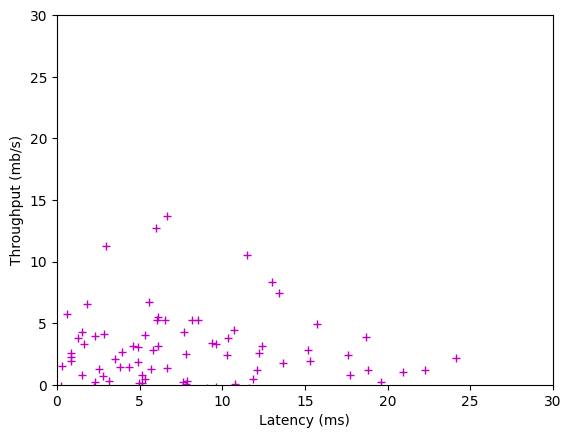

In [11]:
plt.plot(X[:, 0], X[:, 1], "m+")
plt.axis([0, 30, 0, 30])
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

In [12]:
print(X.shape)

(1000, 11)


In [13]:
def gaussianDist(X):
  m, n = X.shape
  mu = np.zeros(n)
  sigma2 = np.zeros(n)

  for i in range(n):
    mu[i] = np.sum(X[:, i]) / m
    sigma2[i] = np.sum(np.square(X[:, i] - mu[i])) / m
    
  return mu, sigma2

In [14]:
mu, sigma2 = gaussianDist(X)

In [15]:
mu

array([  4.93940034,  -9.63726819,  13.81470749, -10.4644888 ,
        -7.95622922,  10.19950372,  -6.01940755,   7.96982896,
        -6.2531819 ,   2.32451289,   8.47372252])

In [16]:
sigma2

array([60.97489373, 53.20572186, 58.51546272, 84.20403725, 65.26859177,
       89.57487757, 55.63349911, 87.16233783, 29.62926829, 70.7852052 ,
       50.50356719])

In [17]:
def p_x(X, mu, sigma2):
  prob = (1 / (np.sqrt(2 * np.pi) * np.sqrt(sigma2))) * np.exp(-((X - mu) ** 2) / (2 * sigma2))
  p_final = np.prod(prob, axis= 1)
  return p_final

In [18]:
p = p_x(X, mu, sigma2)

In [19]:
def selectThreshold(y_val, p_val):
    best_Epsilon = 0
    best_F1 = 0
    F1 = 0
    
    for epsilon in np.linspace(1.01 * min(p_val), max(p_val), 1000):
        predictions = (p_val < epsilon)
        tp = np.sum((predictions == y_val) & (y_val == 1))
        fp = np.sum((predictions == 1) & (y_val == 0))
        fn = np.sum((predictions == 0) & (y_val == 1))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)

        if F1 > best_F1:
            best_F1 = F1
            best_Epsilon = epsilon

    return best_Epsilon, best_F1

In [20]:
p_val = p_x(X_val, mu, sigma2)

epsilon, F1 = selectThreshold(y_val[:,0], p_val)

In [21]:
print("Best epsilon found using cross-validation: %.2e" % epsilon)
print("Best F1 on Cross Validation Set          : %f\n" % F1)

print("\n# Outliers found: %d" % np.sum(p < epsilon))

Best epsilon found using cross-validation: 1.38e-18
Best F1 on Cross Validation Set          : 0.615385


# Outliers found: 117
